In [1]:
import csv
import os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
# Series for graph, Number of Sessions by PPD since start of BCC
session_count = {}

# Series for graph, Earned Amount by PPD since start of BCC
earned_amount = {}

# Series for graph, Paid Amount by PPD since start of BCC
paid_amount = {}

# Paid Amount and Earned amount may be delayed due to reimbursements from Insurance

# Counter used to move across years
global_counter = 0

# Counter for total sessions
total_sessions = 0
yearly_sessions = 0

# Running total of Payment
total_pay = 0
yearly_pay = 0

# Pandas DataFrame for Sessions Performed
Sessions_Performed = {}

# Pandas DataFrame for Reconciled Payments from BCC
BCC_Reconcile = {}


In [3]:
# Read in the List of Clients
data_file = 'Data/clients.csv'

clients = pd.read_csv(data_file, keep_default_na=False)
for index in clients.index:
    clients.at[index, "Name"] = clients.at[index, "Name"].title()
    clients.at[index, "Name"] = clients.at[index, "Name"].rstrip()
    
#print(clients)

In [4]:
# Read in List of Pay Periods
data_file = 'Data/Pay_Periods.csv'

PayPeriods = pd.read_csv(data_file, keep_default_na=False)
for index in PayPeriods.index:
    day = PayPeriods.at[index, "Start"]
    day0 = datetime.strptime(day, '%d-%b-%y')
    PayPeriods.at[index, "Start"] = day0
    day = PayPeriods.at[index, "End"]
    day0 = datetime.strptime(day, '%d-%b-%y')
    PayPeriods.at[index, "End"] = day0

#print(PayPeriods)

In [5]:
base_name = "Data/2021."
yearly_sessions = 0
yearly_pay = 0

for ppd in range(15,27):
    global_counter += 1
    session_count[global_counter] = 0
    data_file = base_name + str(ppd).zfill(2) + ".csv"

    Sessions_Performed[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    
    Sessions_Performed[global_counter] = Sessions_Performed[global_counter].fillna(0)
    for index in Sessions_Performed[global_counter].index:
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].title()
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].rstrip()
    Sessions_Performed[global_counter]['Session'] = pd.to_numeric(Sessions_Performed[global_counter]['Session'])
    Sessions_Performed[global_counter]['Amount'] = Sessions_Performed[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Amount'] = pd.to_numeric(Sessions_Performed[global_counter]['Amount'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    Sessions_Performed[global_counter]['Percentage'] = pd.to_numeric(Sessions_Performed[global_counter]['Percentage'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'] / 100
    Sessions_Performed[global_counter]['Therapist'] = Sessions_Performed[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Therapist'] = pd.to_numeric(Sessions_Performed[global_counter]['Therapist'])
    for index in Sessions_Performed[global_counter].index:
        day = Sessions_Performed[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        Sessions_Performed[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % global_counter)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("%2i Sessions" % Sessions_Performed[global_counter]["Session"].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Amount'].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Therapist'].sum())

    for ii, Paid in Sessions_Performed[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print(Paid['Name'])
            
    session_count[global_counter] = Sessions_Performed[global_counter]['Session'].sum()
    total_sessions += Sessions_Performed[global_counter]['Session'].sum()
    yearly_sessions += Sessions_Performed[global_counter]['Session'].sum()
    earned_amount[global_counter] = Sessions_Performed[global_counter]['Therapist'].sum()
    total_pay += Sessions_Performed[global_counter]['Therapist'].sum()
    yearly_pay += Sessions_Performed[global_counter]['Therapist'].sum()
    
avg_session = (yearly_pay/(float)(yearly_sessions))
print("\nYear - 2021\n" + "="*60)
print("Sessions This Year: %i" % yearly_sessions)
print("Payment This Year: $ %5.2f" % yearly_pay)
print("Average This Year: $ %5.2f" % avg_session)
print("-"*20)
print("Total Sessions: %i" % total_sessions)
print("Total Payment: $ %5.2f" % total_pay)



Year - 2021
Sessions This Year: 210
Payment This Year: $ 10904.11
Average This Year: $ 51.92
--------------------
Total Sessions: 210
Total Payment: $ 10904.11


In [6]:
base_name = "Data/2022."
yearly_sessions = 0
yearly_pay = 0

for ppd in range(1,27):
    global_counter += 1
    session_count[global_counter] = 0
    data_file = base_name + str(ppd).zfill(2) + ".csv"
    Sessions_Performed[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    
    Sessions_Performed[global_counter] = Sessions_Performed[global_counter].fillna(0)
    for index in Sessions_Performed[global_counter].index:
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].title()
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].rstrip()
    Sessions_Performed[global_counter]['Session'] = pd.to_numeric(Sessions_Performed[global_counter]['Session'])
    Sessions_Performed[global_counter]['Amount'] = Sessions_Performed[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Amount'] = pd.to_numeric(Sessions_Performed[global_counter]['Amount'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    Sessions_Performed[global_counter]['Percentage'] = pd.to_numeric(Sessions_Performed[global_counter]['Percentage'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'] / 100
    Sessions_Performed[global_counter]['Therapist'] = Sessions_Performed[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Therapist'] = pd.to_numeric(Sessions_Performed[global_counter]['Therapist'])
    for index in Sessions_Performed[global_counter].index:
        day = Sessions_Performed[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        Sessions_Performed[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % global_counter)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("%2i Sessions" % Sessions_Performed[global_counter]["Session"].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Amount'].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Therapist'].sum())

    for ii, Paid in Sessions_Performed[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print(Paid['Name'])
            
    session_count[global_counter] = Sessions_Performed[global_counter]['Session'].sum()
    total_sessions += Sessions_Performed[global_counter]['Session'].sum()
    yearly_sessions += Sessions_Performed[global_counter]['Session'].sum()
    earned_amount[global_counter] = Sessions_Performed[global_counter]['Therapist'].sum()
    total_pay += Sessions_Performed[global_counter]['Therapist'].sum()
    yearly_pay += Sessions_Performed[global_counter]['Therapist'].sum()

avg_session = (yearly_pay/(float)(yearly_sessions))
print("\nYear - 2022\n" + "="*60)
print("Sessions This Year: %i" % yearly_sessions)
print("Payment This Year: $ %5.2f" % yearly_pay)
print("Average This Year: $ %5.2f" % avg_session)
print("-"*20)
print("Total Sessions: %i" % total_sessions)
print("Total Payment: $ %5.2f" % total_pay)
print(global_counter)



Year - 2022
Sessions This Year: 676
Payment This Year: $ 39001.79
Average This Year: $ 57.69
--------------------
Total Sessions: 886
Total Payment: $ 49905.90
38


In [7]:
base_name = "Data/2023."
yearly_sessions = 0
yearly_pay = 0

for ppd in range(1,27):
    global_counter += 1
    session_count[global_counter] = 0
    data_file = base_name + str(ppd).zfill(2) + ".csv"
#    print(data_file)
    
    Sessions_Performed[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    
    Sessions_Performed[global_counter] = Sessions_Performed[global_counter].fillna(0)
    for index in Sessions_Performed[global_counter].index:
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].title()
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].rstrip()
#        print(Sessions_Performed[global_counter].at[index, "Name"])
    Sessions_Performed[global_counter]['Session'] = pd.to_numeric(Sessions_Performed[global_counter]['Session'])
#    print(Sessions_Performed[global_counter])
    Sessions_Performed[global_counter]['Amount'] = Sessions_Performed[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Amount'] = pd.to_numeric(Sessions_Performed[global_counter]['Amount'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    Sessions_Performed[global_counter]['Percentage'] = pd.to_numeric(Sessions_Performed[global_counter]['Percentage'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'] / 100
    Sessions_Performed[global_counter]['Therapist'] = Sessions_Performed[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Therapist'] = pd.to_numeric(Sessions_Performed[global_counter]['Therapist'])
    for index in Sessions_Performed[global_counter].index:
        day = Sessions_Performed[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        Sessions_Performed[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % global_counter)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("%2i Sessions" % Sessions_Performed[global_counter]["Session"].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Amount'].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Therapist'].sum())

    for ii, Paid in Sessions_Performed[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print(Paid['Name'])
            
    session_count[global_counter] = Sessions_Performed[global_counter]['Session'].sum()
    total_sessions += Sessions_Performed[global_counter]['Session'].sum()
    yearly_sessions += Sessions_Performed[global_counter]['Session'].sum()
    earned_amount[global_counter] = Sessions_Performed[global_counter]['Therapist'].sum()
    total_pay += Sessions_Performed[global_counter]['Therapist'].sum()
    yearly_pay += Sessions_Performed[global_counter]['Therapist'].sum()

avg_session = (yearly_pay/(float)(yearly_sessions))
print("\nYear - 2023\n" + "="*60)
print("Sessions This Year: %i" % yearly_sessions)
print("Payment This Year: $ %5.2f" % yearly_pay)
print("Average This Year: $ %5.2f" % avg_session)
print("-"*20)
print("Total Sessions: %i" % total_sessions)
print("Total Payment: $ %5.2f" % total_pay)



Year - 2023
Sessions This Year: 1038
Payment This Year: $ 56368.57
Average This Year: $ 54.30
--------------------
Total Sessions: 1924
Total Payment: $ 106274.47


In [8]:
base_name = "Data/2024."
yearly_sessions = 0
yearly_pay = 0

for ppd in range(1,27):
    global_counter += 1
    session_count[global_counter] = 0
    data_file = base_name + str(ppd).zfill(2) + ".csv"
#    print(data_file)
    
    Sessions_Performed[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    
    Sessions_Performed[global_counter] = Sessions_Performed[global_counter].fillna(0)
    for index in Sessions_Performed[global_counter].index:
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].title()
        Sessions_Performed[global_counter].at[index, "Name"] = Sessions_Performed[global_counter].at[index, "Name"].rstrip()
#        print(Sessions_Performed[global_counter].at[index, "Name"])
    Sessions_Performed[global_counter]['Session'] = pd.to_numeric(Sessions_Performed[global_counter]['Session'])
    Sessions_Performed[global_counter]['Amount'] = Sessions_Performed[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Amount'] = pd.to_numeric(Sessions_Performed[global_counter]['Amount'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    Sessions_Performed[global_counter]['Percentage'] = pd.to_numeric(Sessions_Performed[global_counter]['Percentage'])
    Sessions_Performed[global_counter]['Percentage'] = Sessions_Performed[global_counter]['Percentage'] / 100
    Sessions_Performed[global_counter]['Therapist'] = Sessions_Performed[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    Sessions_Performed[global_counter]['Therapist'] = pd.to_numeric(Sessions_Performed[global_counter]['Therapist'])
    for index in Sessions_Performed[global_counter].index:
        day = Sessions_Performed[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        Sessions_Performed[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % global_counter)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("%2i Sessions" % Sessions_Performed[global_counter]["Session"].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Amount'].sum())
#     print("$%5.2f" % Sessions_Performed[global_counter]['Therapist'].sum())

    for ii, Paid in Sessions_Performed[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print(Paid['Name'])
            
    session_count[global_counter] = Sessions_Performed[global_counter]['Session'].sum()
    total_sessions += Sessions_Performed[global_counter]['Session'].sum()
    yearly_sessions += Sessions_Performed[global_counter]['Session'].sum()
    earned_amount[global_counter] = Sessions_Performed[global_counter]['Therapist'].sum()
    total_pay += Sessions_Performed[global_counter]['Therapist'].sum()
    yearly_pay += Sessions_Performed[global_counter]['Therapist'].sum()

avg_session = (yearly_pay/(float)(yearly_sessions))
print("\nYear - 2024\n" + "="*60)
print("Sessions This Year: %i" % yearly_sessions)
print("Payment This Year: $ %5.2f" % yearly_pay)
print("Average This Year: $ %5.2f" % avg_session)
print("-"*20)
print("Total Sessions: %i" % total_sessions)
print("Total Payment: $ %5.2f" % total_pay)



Year - 2024
Sessions This Year: 336
Payment This Year: $ 18630.90
Average This Year: $ 55.45
--------------------
Total Sessions: 2260
Total Payment: $ 124905.37


In [9]:
base_name = "Data/BCC_2021."

global_counter = 0

for ppd in range(15,27):
    global_counter += 1
    data_file = base_name + str(ppd).zfill(2) + ".csv"

    BCC_Reconcile[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    BCC_Reconcile[global_counter] = BCC_Reconcile[global_counter].fillna(0)
    for index in BCC_Reconcile[global_counter].index:
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].title()
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].rstrip()
    BCC_Reconcile[global_counter]['Amount'] = BCC_Reconcile[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Amount'] = pd.to_numeric(BCC_Reconcile[global_counter]['Amount'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    BCC_Reconcile[global_counter]['Percentage'] = pd.to_numeric(BCC_Reconcile[global_counter]['Percentage'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'] / 100
    BCC_Reconcile[global_counter]['Therapist'] = BCC_Reconcile[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Therapist'] = pd.to_numeric(BCC_Reconcile[global_counter]['Therapist'])
    for index in BCC_Reconcile[global_counter].index:
        day = BCC_Reconcile[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        BCC_Reconcile[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % ppd)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Amount'].sum())
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Therapist'].sum())
    paid_amount[global_counter] = BCC_Reconcile[global_counter]['Therapist'].sum()
    
    for ii, Paid in BCC_Reconcile[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print("Cannot find %s in client.csv file" % Paid['Name'])

#     for ii, Paid in BCC_Reconcile[global_counter].iterrows():
#         found = 'False'
#         for ppp in range(1,12):
#             for jj, row in Sessions_Performed[ppp].iterrows():
#                 if (found == 'False'):
#                     if(row["Name"] == Paid["Name"]):
#                         if(row["Date"] == Paid["Date"]):
#                             if(row["Amount"] == Paid["Amount"]):
#                                 found = 'True'
                                #print(Paid['Name'], Paid['Date'], Paid['Amount'], ppp)
                            
    
    

In [10]:
base_name = "Data/BCC_2022."

#BCC_Reconcile = {}

for ppd in range(1,27):
    global_counter += 1
    data_file = base_name + str(ppd).zfill(2) + ".csv"

    BCC_Reconcile[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    BCC_Reconcile[global_counter] = BCC_Reconcile[global_counter].fillna(0)
    for index in BCC_Reconcile[global_counter].index:
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].title()
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].rstrip()
    BCC_Reconcile[global_counter]['Amount'] = BCC_Reconcile[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Amount'] = pd.to_numeric(BCC_Reconcile[global_counter]['Amount'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    BCC_Reconcile[global_counter]['Percentage'] = pd.to_numeric(BCC_Reconcile[global_counter]['Percentage'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'] / 100
    BCC_Reconcile[global_counter]['Therapist'] = BCC_Reconcile[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Therapist'] = pd.to_numeric(BCC_Reconcile[global_counter]['Therapist'])
    for index in BCC_Reconcile[global_counter].index:
        day = BCC_Reconcile[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        BCC_Reconcile[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % ppd)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Amount'].sum())
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Therapist'].sum())
    paid_amount[global_counter] = BCC_Reconcile[global_counter]['Therapist'].sum()
    
    for ii, Paid in BCC_Reconcile[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print("Cannot find %s in client.csv file" % Paid['Name'])

#     for ii, Paid in BCC_Reconcile[global_counter].iterrows():
#         found = 'False'
#         for ppp in range(1,27):
#             for jj, row in Sessions_Performed[ppp].iterrows():
#                 if (found == 'False'):
#                     if(row["Name"] == Paid["Name"]):
#                         if(row["Date"] == Paid["Date"]):
#                             if(row["Amount"] == Paid["Amount"]):
#                                 found = 'True'
                                #print(Paid['Name'], Paid['Date'], Paid['Amount'], ppp)
                            
    
    

In [11]:
base_name = "Data/BCC_2023."

#BCC_Reconcile = {}

for ppd in range(1,27):
    global_counter += 1
    data_file = base_name + str(ppd).zfill(2) + ".csv"

    BCC_Reconcile[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    BCC_Reconcile[global_counter] = BCC_Reconcile[global_counter].fillna(0)
    for index in BCC_Reconcile[global_counter].index:
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].title()
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].rstrip()
    BCC_Reconcile[global_counter]['Amount'] = BCC_Reconcile[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Amount'] = pd.to_numeric(BCC_Reconcile[global_counter]['Amount'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    BCC_Reconcile[global_counter]['Percentage'] = pd.to_numeric(BCC_Reconcile[global_counter]['Percentage'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'] / 100
    BCC_Reconcile[global_counter]['Therapist'] = BCC_Reconcile[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Therapist'] = pd.to_numeric(BCC_Reconcile[global_counter]['Therapist'])
    for index in BCC_Reconcile[global_counter].index:
        day = BCC_Reconcile[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        BCC_Reconcile[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % ppd)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Amount'].sum())
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Therapist'].sum())
    paid_amount[global_counter] = BCC_Reconcile[global_counter]['Therapist'].sum()
    
    for ii, Paid in BCC_Reconcile[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print("Cannot find %s in client.csv file" % Paid['Name'])

#     for ii, Paid in BCC_Reconcile[global_counter].iterrows():
#         found = 'False'
#         for ppp in range(1,27):
#             for jj, row in Sessions_Performed[ppp].iterrows():
#                 if (found == 'False'):
#                     if(row["Name"] == Paid["Name"]):
#                         if(row["Date"] == Paid["Date"]):
#                             if(row["Amount"] == Paid["Amount"]):
#                                 found = 'True'
                                #print(Paid['Name'], Paid['Date'], Paid['Amount'], ppp)
                            
    
    

In [12]:
base_name = "Data/BCC_2024."

#BCC_Reconcile = {}

for ppd in range(1,27):
    global_counter += 1
    data_file = base_name + str(ppd).zfill(2) + ".csv"

    BCC_Reconcile[global_counter] = pd.read_csv(data_file, keep_default_na=True)
    BCC_Reconcile[global_counter] = BCC_Reconcile[global_counter].fillna(0)
    for index in BCC_Reconcile[global_counter].index:
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].title()
        BCC_Reconcile[global_counter].at[index, "Name"] = BCC_Reconcile[global_counter].at[index, "Name"].rstrip()
    BCC_Reconcile[global_counter]['Amount'] = BCC_Reconcile[global_counter]['Amount'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Amount'] = pd.to_numeric(BCC_Reconcile[global_counter]['Amount'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'].map(lambda x: x.rstrip('%'))
    BCC_Reconcile[global_counter]['Percentage'] = pd.to_numeric(BCC_Reconcile[global_counter]['Percentage'])
    BCC_Reconcile[global_counter]['Percentage'] = BCC_Reconcile[global_counter]['Percentage'] / 100
    BCC_Reconcile[global_counter]['Therapist'] = BCC_Reconcile[global_counter]['Therapist'].map(lambda x: x.lstrip('$'))
    BCC_Reconcile[global_counter]['Therapist'] = pd.to_numeric(BCC_Reconcile[global_counter]['Therapist'])
    for index in BCC_Reconcile[global_counter].index:
        day = BCC_Reconcile[global_counter].at[index, "Date"]
        day0 = datetime.strptime(day, '%m/%d/%Y')
        BCC_Reconcile[global_counter].at[index, "Date"] = day0

#     print("\n" + "="*60)
#     print("Pay Period %i" % ppd)
#     print("Starts " + datetime.strftime(PayPeriods.loc[global_counter-1,"Start"],"%m/%d/%Y"))
#     print("Ends " + datetime.strftime(PayPeriods.loc[global_counter-1,"End"],"%m/%d/%Y\n") +"-"*20)
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Amount'].sum())
#     print("$%5.2f" % BCC_Reconcile[global_counter]['Therapist'].sum())
    paid_amount[global_counter] = BCC_Reconcile[global_counter]['Therapist'].sum()
    
    for ii, Paid in BCC_Reconcile[global_counter].iterrows():
        found = 'False'
        for jj, row in clients.iterrows():
            if(row["Name"] == Paid["Name"]):
                found = 'True'
        if(found == 'False'):
            print("Cannot find %s in client.csv file" % Paid['Name'])

#     for ii, Paid in BCC_Reconcile[global_counter].iterrows():
#         found = 'False'
#         for ppp in range(1,27):
#             for jj, row in Sessions_Performed[ppp].iterrows():
#                 if (found == 'False'):
#                     if(row["Name"] == Paid["Name"]):
#                         if(row["Date"] == Paid["Date"]):
#                             if(row["Amount"] == Paid["Amount"]):
#                                 found = 'True'
                                #print(Paid['Name'], Paid['Date'], Paid['Amount'], ppp)
                            
    
    

[0, 7, 4, 9.0, 10.0, 14.0, 23.0, 27.0, 30.0, 30.0, 24.0, 32.0, 25.0, 20.0, 28.0, 30.0, 36.0, 33.0, 23.0, 6.0, 20.0, 28.0, 25.0, 19.0, 29.0, 26.0, 26.0, 25.0, 13.0, 27.0, 29.0, 30.0, 28.0, 30.0, 32.0, 30.0, 23.0, 35.0, 21.0, 42.0, 38.0, 43.0, 42.0, 41.0, 44.0, 24.0, 44.0, 41.0, 44.0, 47.0, 41.0, 48.0, 39.0, 24.0, 48.0, 47.0, 46.0, 47.0, 41.0, 37.0, 46.0, 36.0, 31.0, 36.0, 19.0, 34.0, 39.0, 34.0, 29.0, 34.0, 26.0, 25.0, 25.0, 34.0, 35.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0]


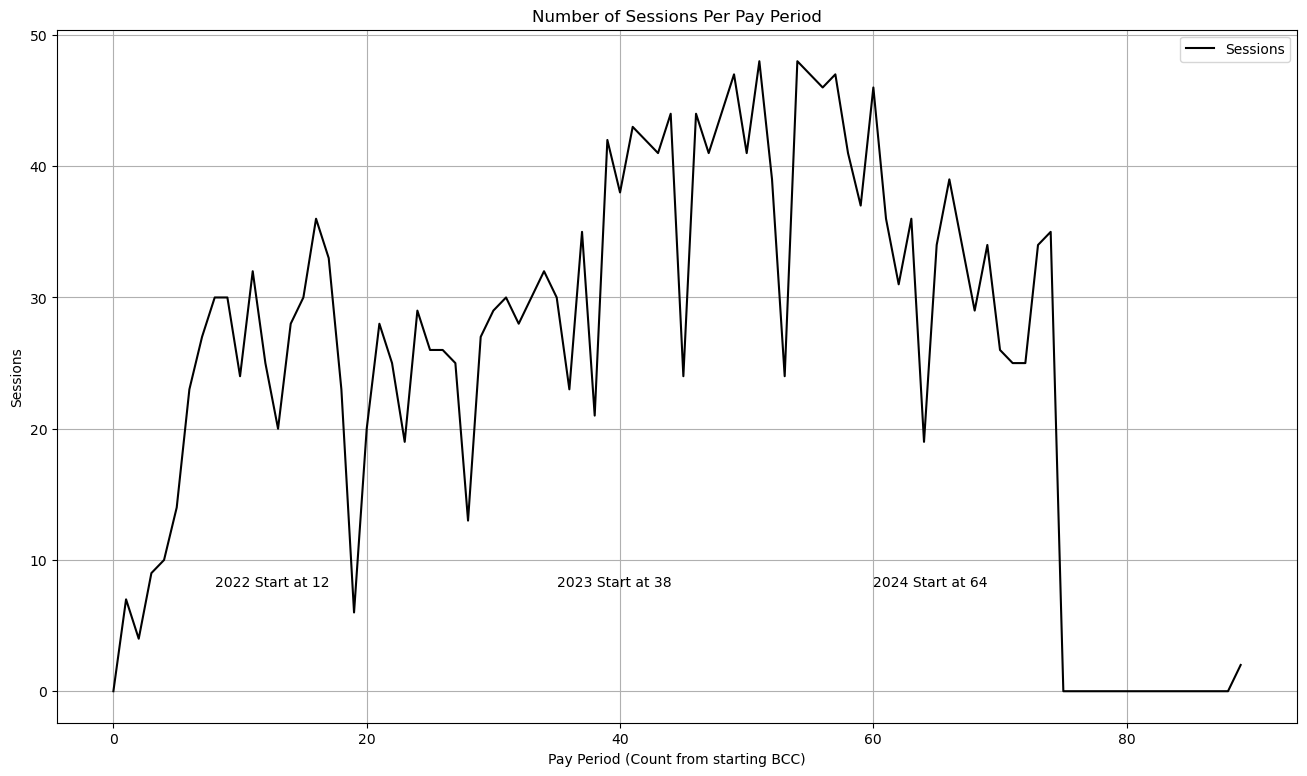

In [13]:
# Print number of sessions per ppd
fig, ax = plt.subplots(figsize=(16,9))

values = list(session_count.values())
ax.plot(values, color="black", label="Sessions")
ax.title.set_text("Number of Sessions Per Pay Period")
ax.set_ylabel("Sessions")
ax.set_xlabel("Pay Period (Count from starting BCC)")
ax.annotate("2022 Start at 12",xy=(8,8))
ax.annotate("2023 Start at 38",xy=(35,8))
ax.annotate("2024 Start at 64",xy=(60,8))
ax.legend()
ax.grid()
print(values)

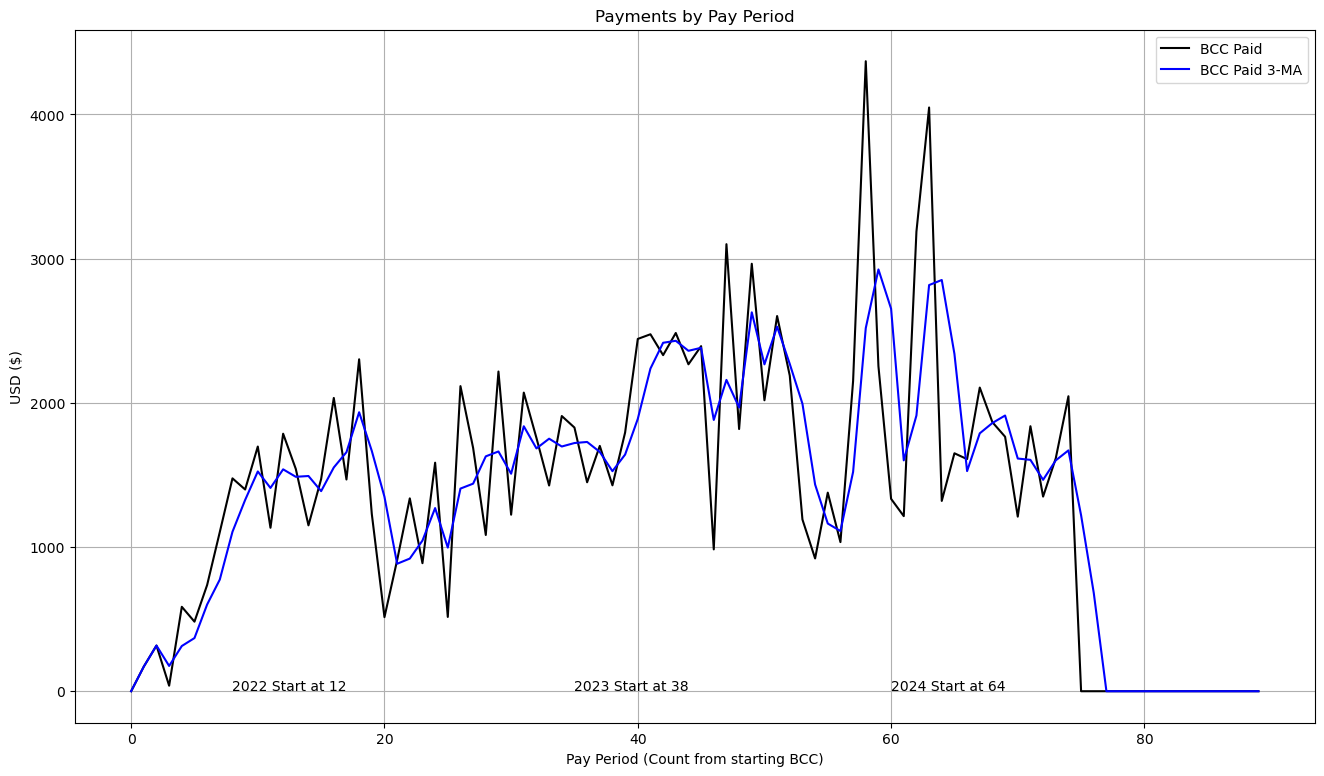

In [14]:
# Plot the Amount Paid and a running average
fig, ax = plt.subplots(figsize=(16,9))

pay_values = list(paid_amount.values())
pay_values_ave = pay_values.copy()
for ii in range(3,len(pay_values)):
    pay_values_ave[ii] = (pay_values[ii] + pay_values[ii-1] + pay_values[ii-2])/3
ax.plot(pay_values, color="black", label="BCC Paid")
ax.plot(pay_values_ave, color="blue", label="BCC Paid 3-MA")
ax.title.set_text("Payments by Pay Period")
ax.set_ylabel("USD ($)")
ax.set_xlabel("Pay Period (Count from starting BCC)")
ax.annotate("2022 Start at 12",xy=(8,8))
ax.annotate("2023 Start at 38",xy=(35,8))
ax.annotate("2024 Start at 64",xy=(60,8))
ax.legend()
ax.grid()

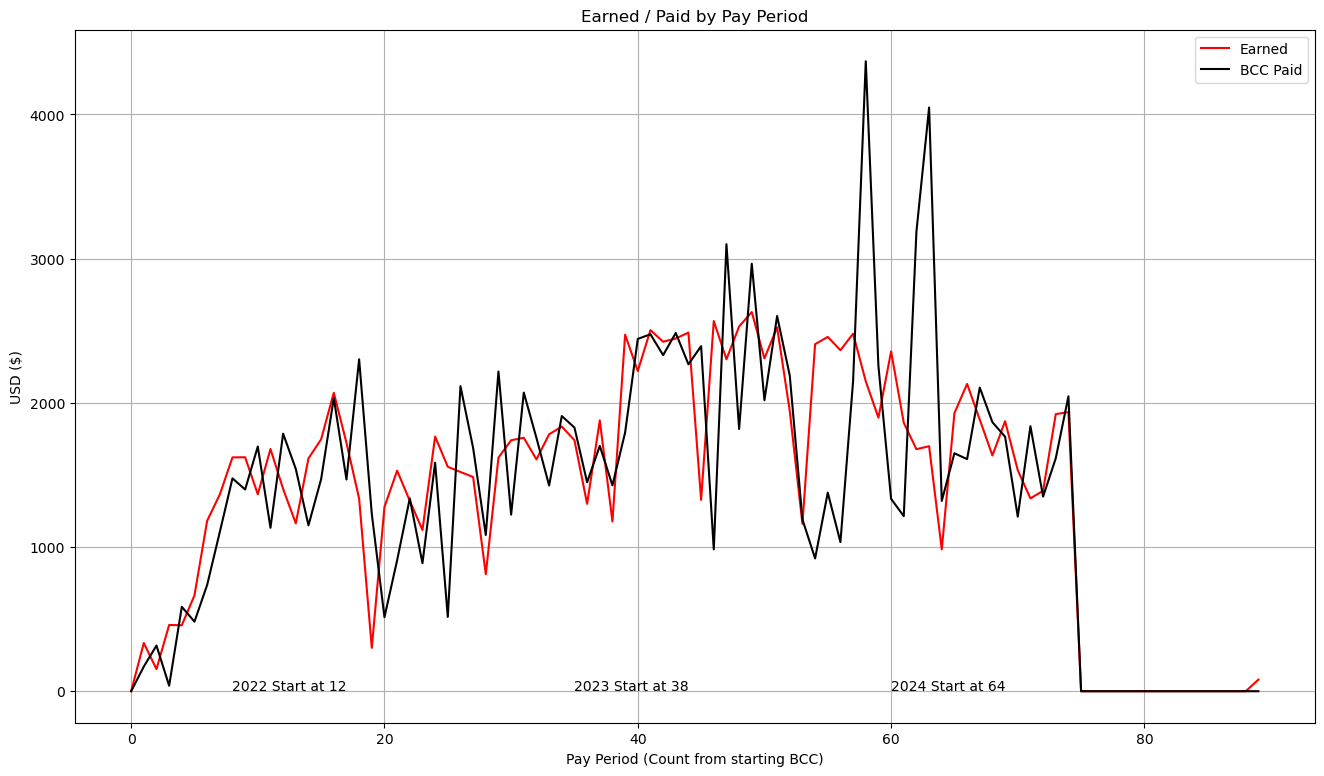

In [15]:
# Plot the Amount Paid and Earned to see the lag in payments
fig, ax = plt.subplots(figsize=(16,9))

earn_values = list(earned_amount.values())
ax.plot(earn_values, color="red", label="Earned")
pay_values = list(paid_amount.values())
pay_values_ave = pay_values.copy()
ax.plot(pay_values, color="black", label="BCC Paid")
ax.title.set_text("Earned / Paid by Pay Period")
ax.set_ylabel("USD ($)")
ax.set_xlabel("Pay Period (Count from starting BCC)")
ax.annotate("2022 Start at 12",xy=(8,8))
ax.annotate("2023 Start at 38",xy=(35,8))
ax.annotate("2024 Start at 64",xy=(60,8))
ax.legend()
ax.grid()

In [16]:
BCC_df_2021 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())
BCC_df_2022 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())
BCC_df_2023 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())
BCC_df_2024 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())

# For BCC
for args in clients["Name"]:
    BCC_df_2021[args] = 0.0
    BCC_df_2022[args] = 0.0
    BCC_df_2023[args] = 0.0
    BCC_df_2024[args] = 0.0
#print(BCC_df_2021)

ACS_df_2021 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())
ACS_df_2022 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())
ACS_df_2023 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())
ACS_df_2024 = pd.DataFrame(index=range(1,367),columns=clients["Name"].to_numpy())

# For My Accounting
for args in clients["Name"]:
    ACS_df_2021[args] = 0.0
    ACS_df_2022[args] = 0.0
    ACS_df_2023[args] = 0.0
    ACS_df_2024[args] = 0.0
#print(ACS_df_2021)

# Put BCC Data into Dataframe
for key1 in BCC_Reconcile.keys():
    for index in BCC_Reconcile[key1].index:
        name = BCC_Reconcile[key1].at[index, "Name"]
        day1 = BCC_Reconcile[key1].at[index, "Date"]
        day2=day1.timetuple().tm_yday
        year=day1.year
        if(year == 2021):
            BCC_df_2021[name][day2] += BCC_Reconcile[key1].at[index,"Therapist"]
        if(year == 2022):
            BCC_df_2022[name][day2] += BCC_Reconcile[key1].at[index,"Therapist"]
        if(year == 2023):
            BCC_df_2023[name][day2] += BCC_Reconcile[key1].at[index,"Therapist"]
        if(year == 2024):
            BCC_df_2024[name][day2] += BCC_Reconcile[key1].at[index,"Therapist"]

# Put my Data into Dataframe
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        name = Sessions_Performed[key1].at[index, "Name"]
        day1 = Sessions_Performed[key1].at[index, "Date"]
        day2=day1.timetuple().tm_yday
        year=day1.year
        if(year == 2021):
            ACS_df_2021[name][day2] += Sessions_Performed[key1].at[index,"Therapist"]
        if(year == 2022):
            ACS_df_2022[name][day2] += Sessions_Performed[key1].at[index,"Therapist"]
        if(year == 2023):
            ACS_df_2023[name][day2] += Sessions_Performed[key1].at[index,"Therapist"]
        if(year == 2024):
            ACS_df_2024[name][day2] += Sessions_Performed[key1].at[index,"Therapist"]

            
###################################
# Show ALL of the outstanding items
sum_diff = 0.0
print("\n"+"="*60)
print("All Outstanding Items\n")
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2021[name][ii] - ACS_df_2021[name][ii]
        if(abs(aa) > 0.001):
            print(name, ",", datetime.strptime('2021'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2022[name][ii] - ACS_df_2022[name][ii]
        if(abs(aa) > 0.001):
            print(name, ",", datetime.strptime('2022'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2023[name][ii] - ACS_df_2023[name][ii]
        if(abs(aa) > 0.001):
            print(name, ",", datetime.strptime('2023'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2024[name][ii] - ACS_df_2024[name][ii]
        if(abs(aa) > 0.001):
            print(name, ",", datetime.strptime('2024'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
            sum_diff += aa
print("\nDifference = $ %5.2f\n" % sum_diff)

###################################
# Show ONLY greater than 60 days old
today = datetime.today()
t_day = today.strftime("%Y-%m-%d")
lapse = datetime.today() - timedelta(days=60)
sum_diff = 0.0
print("\n"+"="*60)
print("All Items more than 60 days old\n")
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2021[name][ii] - ACS_df_2021[name][ii]
        if(abs(aa) > 0.001):
            print(name, datetime.strptime('2021'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2022[name][ii] - ACS_df_2022[name][ii]
        item_date = datetime.strptime('2022'+ str(ii),'%Y%j')
        if((item_date < lapse) & (abs(aa) > 0.001)):
            print(name, datetime.strptime('2022'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2023[name][ii] - ACS_df_2023[name][ii]
        item_date = datetime.strptime('2023'+ str(ii),'%Y%j')
        if((item_date < lapse) & (abs(aa) > 0.001)):
            print(name, ",", datetime.strptime('2023'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
#            print(name, datetime.strptime('2023'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2024[name][ii] - ACS_df_2024[name][ii]
        item_date = datetime.strptime('2024'+ str(ii),'%Y%j')
        if((item_date < lapse) & (abs(aa) > 0.001)):
            print(name, ",", datetime.strptime('2024'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
#            print(name, datetime.strptime('2023'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
print("\nDifference = $ %5.2f\n" % sum_diff)

###################################
# Show ONLY less than 60 days old
today = datetime.today()
t_day = today.strftime("%Y-%m-%d")
lapse = datetime.today() - timedelta(days=60)
lapse2 = datetime.today() - timedelta(days=30)
sum_diff = 0.0
print("\n"+"="*60)
print("All Recent Items (more than 30, less than 60)\n")
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2021[name][ii] - ACS_df_2021[name][ii]
        if(abs(aa) > 0.001):
            print(name, datetime.strptime('2021'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2022[name][ii] - ACS_df_2022[name][ii]
        item_date = datetime.strptime('2022'+ str(ii),'%Y%j')
        if((item_date < lapse2) & (item_date > lapse) & (abs(aa) > 0.001)):
            print(name, datetime.strptime('2022'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2023[name][ii] - ACS_df_2023[name][ii]
        item_date = datetime.strptime('2023'+ str(ii),'%Y%j')
        if((item_date < lapse2) & (item_date > lapse) & (abs(aa) > 0.001)):
            print(name, ",", datetime.strptime('2023'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
#            print(name, datetime.strptime('2023'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2024[name][ii] - ACS_df_2024[name][ii]
        item_date = datetime.strptime('2024'+ str(ii),'%Y%j')
        if((item_date < lapse2) & (item_date > lapse) & (abs(aa) > 0.001)):
            print(name, ",", datetime.strptime('2024'+ str(ii),'%Y%j').date(), ",", "$ %5.2f" % aa)
#            print(name, datetime.strptime('2024'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
print("\nDifference = $ %5.2f\n" % sum_diff)

###################################
# Show ONLY less than 30 days old
today = datetime.today()
t_day = today.strftime("%Y-%m-%d")
lapse = datetime.today() - timedelta(days=30)
sum_diff = 0.0
print("\n"+"="*60)
print("All Recent Items (less than 30)\n")
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2021[name][ii] - ACS_df_2021[name][ii]
        if(abs(aa) > 0.001):
            print(name, datetime.strptime('2021'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2022[name][ii] - ACS_df_2022[name][ii]
        item_date = datetime.strptime('2022'+ str(ii),'%Y%j')
        if((item_date > lapse) & (abs(aa) > 0.001)):
            print(name, datetime.strptime('2022'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2023[name][ii] - ACS_df_2023[name][ii]
        item_date = datetime.strptime('2023'+ str(ii),'%Y%j')
        if((item_date > lapse) & (abs(aa) > 0.001)):
            print(name, datetime.strptime('2023'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
for index in clients.index:
    name = clients.at[index, "Name"]
    for ii in range(1,367):
        aa = BCC_df_2024[name][ii] - ACS_df_2024[name][ii]
        item_date = datetime.strptime('2024'+ str(ii),'%Y%j')
        if((item_date > lapse) & (abs(aa) > 0.001)):
            print(name, datetime.strptime('2024'+ str(ii),'%Y%j').date(), "$ %5.2f" % aa)            
            sum_diff += aa
print("\nDifference = $ %5.2f\n" % sum_diff)


All Outstanding Items

Iyana Conway , 2024-01-04 , $ -50.60
Iyana Conway , 2024-01-10 , $ -50.60
Iyana Conway , 2024-01-11 , $ -50.60
Iyana Conway , 2024-01-17 , $ -50.60
Iyana Conway , 2024-01-19 , $ -50.60
Iyana Conway , 2024-01-24 , $ -50.60
Iyana Conway , 2024-01-25 , $ -50.60
Antoinette Ablaza , 2024-05-10 , $ -53.34
Antoinette Ablaza , 2024-05-16 , $ -53.34
Susan Bernhard , 2024-03-12 , $ -4.66
Susan Bernhard , 2024-03-20 , $  0.01
Susan Bernhard , 2024-04-03 , $  0.01
Susan Bernhard , 2024-04-24 , $ -3.89
Susan Bernhard , 2024-05-01 , $ -3.89
Susan Bernhard , 2024-05-08 , $ -51.64
Susan Bernhard , 2024-05-15 , $ -51.64
Ella Pascale , 2024-03-07 , $ -51.04
Ella Pascale , 2024-05-07 , $ -51.04
Ella Pascale , 2024-05-14 , $ -51.04
Alejandra Castaneda , 2024-05-06 , $ -51.64
Alejandra Castaneda , 2024-05-13 , $ -51.64
Alejandra Castaneda , 2024-05-20 , $ -51.64
Andrew Bernal , 2024-05-15 , $ -51.64
Chase Marshall , 2024-05-14 , $ -46.44
Daniel Schwarz , 2024-05-15 , $ -44.14
Kristi

In [17]:
# Count Sessions for given range

begin_date = '07-01-2021 00:00:00'
end_date = "06-27-2022 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '06-28-2022 00:00:00'
end_date = "09-27-2022 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '09-28-2022 00:00:00'
end_date = "12-27-2022 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '12-28-2022 00:00:00'
end_date = "03-27-2023 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '03-28-2023 00:00:00'
end_date = "06-27-2023 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '06-28-2023 00:00:00'
end_date = "09-27-2023 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '09-28-2023 00:00:00'
end_date = "12-27-2023 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '12-28-2023 00:00:00'
end_date = "03-27-2024 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '03-28-2024 00:00:00'
end_date = "06-27-2024 00:00:00"
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.strptime(end_date, '%m-%d-%Y %H:%M:%S')
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

begin_date = '06-28-2022 00:00:00'
begin_dt = datetime.strptime(begin_date, '%m-%d-%Y %H:%M:%S')
end_dt = datetime.now()
session_count = 0
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        session = Sessions_Performed[key1].at[index, "Session"]
        session_date = Sessions_Performed[key1].at[index, "Date"]
        #print(type(session_date), type(begin_dt))
        if((begin_dt <= session_date) & (session_date <= end_dt)):
            session_count += session
            #print(session_date)
            
print("="*60)
print("Sessions that count towards licensure")
print("Begin: " + begin_dt.strftime("%m/%d/%Y"))
print("End  : " + end_dt.strftime("%m/%d/%Y"))
print("Session Count: %d" % session_count)            

Begin: 07/01/2021
End  : 06/27/2022
Session Count: 544
Begin: 06/28/2022
End  : 09/27/2022
Session Count: 167
Begin: 09/28/2022
End  : 12/27/2022
Session Count: 184
Begin: 12/28/2022
End  : 03/27/2023
Session Count: 262
Begin: 03/28/2023
End  : 06/27/2023
Session Count: 271
Begin: 06/28/2023
End  : 09/27/2023
Session Count: 279
Begin: 09/28/2023
End  : 12/27/2023
Session Count: 234
Begin: 12/28/2023
End  : 03/27/2024
Session Count: 200
Begin: 03/28/2024
End  : 06/27/2024
Session Count: 119
Sessions that count towards licensure
Begin: 06/28/2022
End  : 05/26/2024
Session Count: 1716


In [18]:
# Yearly Write-Offs
# 2021 : +$114.28 (gain) overall
# 2022 : -$194.55 (loss) overall
# 2023 : -$226.21 (loss) overall
# 2024 : 

In [19]:
today = datetime.today()

# dd/mm/YY
t_day = today.strftime("%Y-%m-%d")
lapse = datetime.today() - timedelta(days=60)

a = datetime.strptime('2022'+ str(280),'%Y%j').date()
print(datetime.strptime('2022'+ str(280),'%Y%j').date())
print(today, lapse)

2022-10-07
2024-05-26 15:16:12.432000 2024-03-27 15:16:12.432155


In [20]:
# Client Name
client_name = "Antoinette Ablaza"
# Find Sessions
for key1 in BCC_Reconcile.keys():
    for index in BCC_Reconcile[key1].index:
        name = BCC_Reconcile[key1].at[index, "Name"]
        day1 = BCC_Reconcile[key1].at[index, "Date"]
        day2=day1.timetuple().tm_yday
        year=day1.year
        if(year == 2023):
            if (name == client_name):
                print(name, day1.strftime("%Y-%m-%d"), BCC_Reconcile[key1].at[index,"Therapist"])

Antoinette Ablaza 2023-01-05 6.75
Antoinette Ablaza 2023-01-09 6.75
Antoinette Ablaza 2023-01-09 59.26
Antoinette Ablaza 2023-01-05 59.26
Antoinette Ablaza 2023-02-10 6.75
Antoinette Ablaza 2023-02-10 59.26
Antoinette Ablaza 2023-02-16 6.75
Antoinette Ablaza 2023-02-24 6.75
Antoinette Ablaza 2023-02-24 59.26
Antoinette Ablaza 2023-02-16 59.26
Antoinette Ablaza 2023-02-27 6.75
Antoinette Ablaza 2023-03-01 6.75
Antoinette Ablaza 2023-03-06 6.75
Antoinette Ablaza 2023-03-06 59.26
Antoinette Ablaza 2023-02-27 59.26
Antoinette Ablaza 2023-03-01 59.26
Antoinette Ablaza 2023-03-13 6.75
Antoinette Ablaza 2023-03-20 6.75
Antoinette Ablaza 2023-03-24 6.75
Antoinette Ablaza 2023-03-20 59.26
Antoinette Ablaza 2023-03-24 59.26
Antoinette Ablaza 2023-03-13 59.26
Antoinette Ablaza 2023-04-13 6.75
Antoinette Ablaza 2023-04-18 6.75
Antoinette Ablaza 2023-04-18 59.26
Antoinette Ablaza 2023-04-13 59.26
Antoinette Ablaza 2023-04-24 6.75
Antoinette Ablaza 2023-04-24 59.26
Antoinette Ablaza 2023-05-15 6.75


In [21]:
# Client Name
client_name = "Antoinette Ablaza"
# Find Sessions
for key1 in Sessions_Performed.keys():
    for index in Sessions_Performed[key1].index:
        name = Sessions_Performed[key1].at[index, "Name"]
        day1 = Sessions_Performed[key1].at[index, "Date"]
        day2=day1.timetuple().tm_yday
        year=day1.year
        if(year == 2023):
            if (name == client_name):
                print(name, day1.strftime("%Y-%m-%d"), Sessions_Performed[key1].at[index,"Therapist"])

Antoinette Ablaza 2023-01-05 6.75
Antoinette Ablaza 2023-01-05 59.26
Antoinette Ablaza 2023-01-09 6.75
Antoinette Ablaza 2023-01-09 59.26
Antoinette Ablaza 2023-02-10 6.75
Antoinette Ablaza 2023-02-10 59.26
Antoinette Ablaza 2023-02-16 6.75
Antoinette Ablaza 2023-02-16 59.26
Antoinette Ablaza 2023-02-24 6.75
Antoinette Ablaza 2023-02-24 59.26
Antoinette Ablaza 2023-02-27 6.75
Antoinette Ablaza 2023-02-27 59.26
Antoinette Ablaza 2023-03-01 6.75
Antoinette Ablaza 2023-03-01 59.26
Antoinette Ablaza 2023-03-06 6.75
Antoinette Ablaza 2023-03-06 59.26
Antoinette Ablaza 2023-03-13 6.75
Antoinette Ablaza 2023-03-13 59.26
Antoinette Ablaza 2023-03-20 6.75
Antoinette Ablaza 2023-03-20 59.26
Antoinette Ablaza 2023-03-24 6.75
Antoinette Ablaza 2023-03-24 59.26
Antoinette Ablaza 2023-04-13 6.75
Antoinette Ablaza 2023-04-13 59.26
Antoinette Ablaza 2023-04-18 6.75
Antoinette Ablaza 2023-04-18 59.26
Antoinette Ablaza 2023-04-24 6.75
Antoinette Ablaza 2023-04-24 59.26
Antoinette Ablaza 2023-05-15 6.75
